In [1]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# simple function to plot 2-d data points
def plot_datapoints(data, labels):
    
    assert len(data)==len(labels)
    
    # plot
    plt.figure()
    plt.scatter(data[:,0],data[:,1])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")

    # add a label (=number) to each instance
    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points')
    plt.show()


In [3]:
# function to plot and store dentrograms as created by scipy.hierarchical

def plot_dendrogram(cluster_outcome, labels, filename="test"):
    plt.figure()
    dendrogram(cluster_outcome,
               orientation='top',
               labels=labels,
               distance_sort='descending',
               show_leaf_counts=True)
    plt.savefig(f"{fileneame}.pdf", format='pdf')
    plt.show()
    

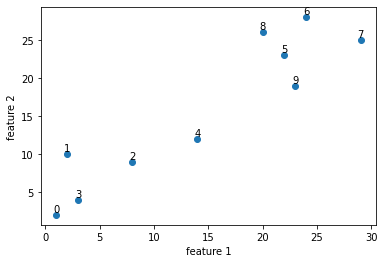

In [11]:
# generate some data points (you could automate this, e.g., using numpy.random)

datapoints = np.array([[1,2],
                       [2,10],
                       [8,9],
                       [3,4],
                       [14,12],
                       [22,23],
                       [24,28],
                       [29,25],
                       [20,26],
                       [23,19]])
labels = range(len(datapoints))

plot_datapoints(datapoints, labels)

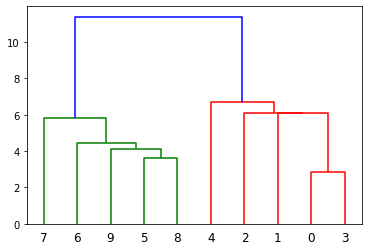

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# perform agglomerative clustering with 'single' linkage
linked = linkage(datapoints, 'single')

# plot the dendrogram
plot_dendrogram(linked, labels)


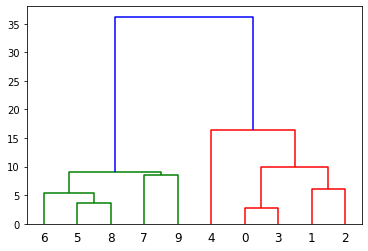

In [6]:
# same as above, with 'complete' linkage
linked = linkage(datapoints, 'complete')
plot_dendrogram(linked, labels)


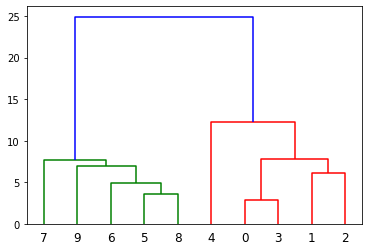

In [7]:
# same as above, with 'average' linkage
linked = linkage(datapoints, 'average')
plot_dendrogram(linked, labels)


The toy dataset above had the advantage that we could plot it in 2d space, and evaluate the clusters directly by inspecting the space. But it's clearly too simplistic to be of any interest.

To make things more interesting, let's go back to Assignment 1, and cluster zoo animals by their features as provided in the "zoo.data" file. The file is provided on canvas, or you can download and find more info on it here:

https://archive.ics.uci.edu/ml/datasets/Zoo

We will name each data point with the animal name (first field per row).

We will remove the last field in each row from the features, as this is the class label (and we want to cluster animals purely based on their features).

In [12]:
# read in the data
zoo = [l.strip().split(",") for l in open("zoo.data", 'r')]

# get the animal names (first fiele)
names = [a[0] for a in zoo]

# get the features (second to penultimate field -- removing name and class label)
features = [a[1:-1] for a in zoo]

In [9]:
# apply agglomerative clustering (try different linkages!)
animal_cluster = linkage(features, 'average')

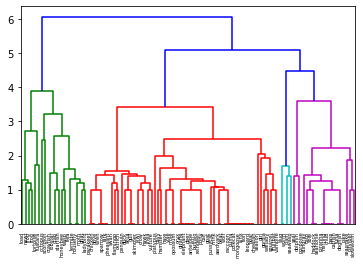

In [13]:
# Plot the resulting cluster. The dendrogram is also stored 
# in a pdf file in this current directory where you can zoom 
# in and inspect the groupings

plot_dendrogram(animal_cluster, names)